In [ ]:
# Etapa 1: Importar bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Verifica versão do TF
print(tf.__version__)


2.18.0


In [ ]:
import tensorflow_datasets as tfds

# Carregando dataset
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ABHP0Q_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = (160, 160)

def format_example(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

train_batches = ds_train.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)
val_batches = ds_val.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binário: gato vs cachorro
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 523s 886ms/step - accuracy: 0.9227 - loss: 0.1736 - val_accuracy: 0.9804 - val_loss: 0.0607
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 519s 892ms/step - accuracy: 0.9797 - loss: 0.0582 - val_accuracy: 0.9813 - val_loss: 0.0571
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 560s 889ms/step - accuracy: 0.9824 - loss: 0.0516 - val_accuracy: 0.9822 - val_loss: 0.0566
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 519s 815ms/step - accuracy: 0.9843 - loss: 0.0475 - val_accuracy: 0.9824 - val_loss: 0.0568
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 543s 886ms/step - accuracy: 0.9855 - loss: 0.0444 - val_accuracy: 0.9811 - val_loss: 0.0572


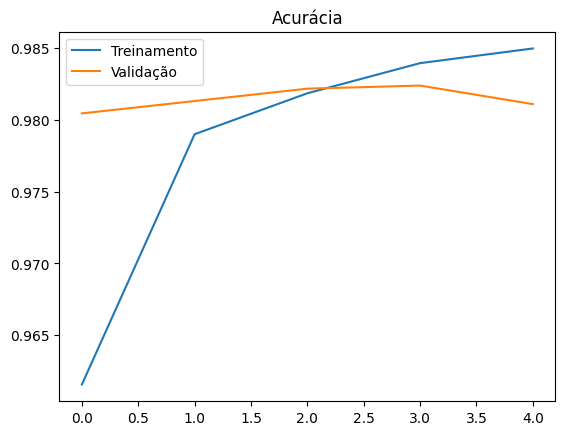

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='Treinamento')
plt.plot(val_acc, label='Validação')
plt.legend()
plt.title("Acurácia")
plt.show()


Saving gato.jpeg to gato.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
A imagem parece ser um: gato


/tmp/ipython-input-12-2594885559.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(pred[0] > 0.5)]


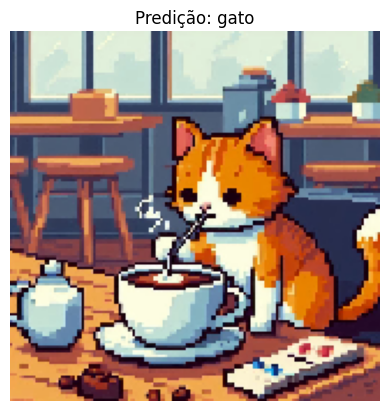

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab import files


# Upload de uma imagem
uploaded = files.upload()

for img_path in uploaded.keys():
    # Carrega e pre-processa a imagem
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # adiciona dimensão do batch
    img_array = img_array / 255.0  # normalização igual ao treino

    # Faz a predição com o modelo já treinado
    pred = model.predict(img_array)

    # Interpreta a saída
    class_names = ['gato', 'cachorro']
    predicted_class = class_names[int(pred[0] > 0.5)]
    print(f"A imagem parece ser um: {predicted_class}")

    # Mostra a imagem
    plt.imshow(img)
    plt.title(f"Predição: {predicted_class}")
    plt.axis("off")
    plt.show()
